In [2]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
pd.options.display.float_format = '{:.6f}'.format
import ccxt
import matplotlib.pyplot as plt
import ta
import numpy as np
import json
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import coint
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression

In [3]:
pair = ["BTC-USDT", "ETH-USDT", "BNB-USDT","ADA-USDT","BCH-USDT","DOGE-USDT","EGLD-USDT","LINK-USDT","MATIC-USDT","SOL-USDT","XRP-USDT","XTZ-USDT","UNI-USDT", "AAVE-USDT","DOT-USDT","FTM-USDT","AVAX-USDT","NEAR-USDT"]

df_list = {}

for _pair in pair:
    df = pd.read_csv(_pair+".csv")
    df = df.set_index(df['date'])
    df['close'] = pd.to_numeric(df['close'])
    df['high'] = pd.to_numeric(df['high'])
    df['low'] = pd.to_numeric(df['low'])
    df['open'] = pd.to_numeric(df['open'])
    df.index = pd.to_datetime(df.index, unit='ms')
    df_list[_pair] = df

df_list

{'BTC-USDT':                               date         open         high          low  \
 date                                                                        
 2017-08-17 04:00:00  1502942400000  4261.480000  4313.620000  4261.320000   
 2017-08-17 05:00:00  1502946000000  4308.830000  4328.690000  4291.370000   
 2017-08-17 06:00:00  1502949600000  4330.290000  4345.450000  4309.370000   
 2017-08-17 07:00:00  1502953200000  4316.620000  4349.990000  4287.410000   
 2017-08-17 08:00:00  1502956800000  4333.320000  4377.850000  4333.320000   
 ...                            ...          ...          ...          ...   
 2025-02-19 12:00:00  1739966400000 96422.600000 96495.000000 96138.400000   
 2025-02-19 13:00:00  1739970000000 96166.450000 96481.600000 96166.440000   
 2025-02-19 14:00:00  1739973600000 96277.540000 96700.000000 95692.000000   
 2025-02-19 15:00:00  1739977200000 95766.330000 96405.450000 95536.360000   
 2025-02-19 16:00:00  1739980800000 95943.740000 962

In [4]:
full_df = pd.DataFrame()
for symbol in df_list:
    full_df[symbol] = df_list[symbol]['close']
cumret = np.log(full_df).diff().cumsum()+1 # calculate cumulative returns
cumret.dropna(inplace=True)
cumret

,BTC-USDT,ETH-USDT,BNB-USDT,ADA-USDT,BCH-USDT,DOGE-USDT,EGLD-USDT,LINK-USDT,MATIC-USDT,SOL-USDT,XRP-USDT,XTZ-USDT,UNI-USDT,AAVE-USDT,DOT-USDT,FTM-USDT,AVAX-USDT,NEAR-USDT
date,,,,,,,,,,,,,,,,,,
2020-10-15 04:00:00,1.971958,1.223084,3.901489,0.078388,1.163320,0.598920,-0.103701,4.051781,2.001449,0.731058,-0.313999,1.778854,1.021222,1.008183,1.287964,0.673427,0.822856,0.895609
2020-10-15 05:00:00,1.973293,1.227372,3.900891,0.083747,1.182146,0.601163,-0.097344,4.061282,2.002614,0.737907,-0.307289,1.790220,1.029295,1.039569,1.294810,0.678772,0.833004,0.881643
2020-10-15 06:00:00,1.972535,1.227953,3.901784,0.081682,1.183592,0.598616,-0.088260,4.061153,2.000282,0.740501,-0.309935,1.796116,1.027194,1.040201,1.293632,0.701260,0.837738,0.864725
2020-10-15 07:00:00,1.972669,1.227821,3.899710,0.088330,1.186514,0.599339,-0.092918,4.061772,1.999698,0.760632,-0.309775,1.791839,1.024732,1.039569,1.295242,0.683381,0.832834,0.833568
2020-10-15 08:00:00,1.967883,1.217818,3.893700,0.077728,1.178295,0.585282,-0.101154,4.045020,1.993839,0.742563,-0.317836,1.774904,1.000565,1.032482,1.278218,0.654674,0.811072,0.825535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 22:00:00,3.586167,3.056163,6.721661,1.254451,1.384328,4.270684,1.116090,4.037107,5.107224,4.818879,0.462643,0.523119,1.804525,2.094520,1.332085,3.527377,2.591432,2.113356
2024-09-09 23:00:00,3.583121,3.057070,6.720697,1.253288,1.386192,4.274740,1.114582,4.034262,5.105394,4.823554,0.463014,0.523119,1.806011,2.089176,1.323952,3.524491,2.585994,2.105662
2024-09-10 00:00:00,3.582069,3.052610,6.714703,1.243634,1.383706,4.269909,1.114205,4.028548,5.101725,4.815825,0.456878,0.518442,1.801844,2.088033,1.320680,3.525935,2.583054,2.104416


In [5]:
pre_select_obj = {}
for col in list(cumret.columns.values):
    pre_select_obj[col] = {
        "return": cumret[col].iloc[-1] - cumret[col].iloc[0],
        # "return": cumret[col].diff().mean(),
        "std": cumret[col].std()
    }
print(pre_select_obj)

{'BTC-USDT': {'return': np.float64(1.6064767498021784), 'std': np.float64(0.435940518258997)}, 'ETH-USDT': {'return': np.float64(1.8278134901620886), 'std': np.float64(0.49429138498060926)}, 'BNB-USDT': {'return': np.float64(2.8139890493367643), 'std': np.float64(0.7152347909601061)}, 'ADA-USDT': {'return': np.float64(1.16141728814183), 'std': np.float64(0.7342911425098787)}, 'BCH-USDT': {'return': np.float64(0.21289064977162653), 'std': np.float64(0.6289213740027002)}, 'DOGE-USDT': {'return': np.float64(3.6640893328695716), 'std': np.float64(1.010201676221171)}, 'EGLD-USDT': {'return': np.float64(1.2141251757899543), 'std': np.float64(0.8217264204653102)}, 'LINK-USDT': {'return': np.float64(-0.03186640574130095), 'std': np.float64(0.557533754228663)}, 'MATIC-USDT': {'return': np.float64(3.096592883888933), 'std': np.float64(1.127290650118242)}, 'SOL-USDT': {'return': np.float64(4.079755542767991), 'std': np.float64(1.2136968715613892)}, 'XRP-USDT': {'return': np.float64(0.768636408148

<Axes: xlabel='return', ylabel='std'>

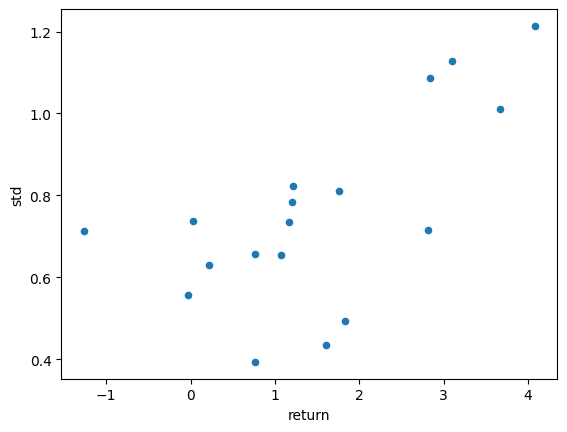

In [6]:
df_pre_select = pd.DataFrame.from_dict(pre_select_obj, orient='index')
df_pre_select.plot.scatter(x='return', y='std')

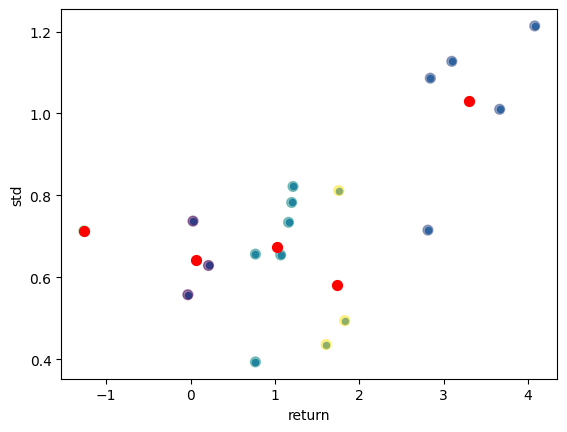

In [ ]:
kmeans = KMeans(n_clusters=5).fit(df_pre_select)
centroids = kmeans.cluster_centers_
# print(centroids)

cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_pre_select.index.values
cluster_map['cluster'] = kmeans.labels_

plt.scatter(df_pre_select['return'], df_pre_select['std'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

In [8]:
print(cluster_map)

    data_index  cluster
0     BTC-USDT        4
1     ETH-USDT        4
2     BNB-USDT        1
3     ADA-USDT        2
4     BCH-USDT        0
5    DOGE-USDT        1
6    EGLD-USDT        2
7    LINK-USDT        0
8   MATIC-USDT        1
9     SOL-USDT        1
10    XRP-USDT        2
11    XTZ-USDT        3
12    UNI-USDT        2
13   AAVE-USDT        2
14    DOT-USDT        0
15    FTM-USDT        1
16   AVAX-USDT        4
17   NEAR-USDT        2


In [9]:
train_cumret = cumret.copy().iloc[:3500] # formation period
test_cumret = cumret.copy().iloc[-1500:] # trading period

get_sub_cluster = 4

df_train = train_cumret.copy()[list(cluster_map[cluster_map.cluster == get_sub_cluster]["data_index"])]
df_test = test_cumret.copy()[list(cluster_map[cluster_map.cluster == get_sub_cluster]["data_index"])]
df_train.columns.values

array(['BTC-USDT', 'ETH-USDT', 'AVAX-USDT'], dtype=object)

In [10]:
train = df_train.copy()
tested = []
metrics_obj = {}

for s1 in train.columns:
    for s2 in train.columns:
        if s1!=s2 and (f'{s1}-{s2}' not in tested) and (f'{s2}-{s1}' not in tested):
                tested.append(f'{s1}-{s2}')
                cadf_p = coint(train[s1], train[s2])[1] #Cointegration: Analyze the stationarity of the residuals from the regression of s1 on s2.
                spread_window = 25
                spread = np.log10(train[s1] / train[s1].shift(periods=spread_window)) - np.log10(train[s2] / train[s2].shift(periods=spread_window))
                spread = spread.fillna(0)
                std_spread = spread.std()
                correlation = train[s1].corr(train[s2])
                metrics_obj[f'{s1}-{s2}'] = {
                    "co-int": cadf_p,
                    "std_spread": std_spread,
                    "correlation": correlation
                }

In [11]:
pd.options.display.float_format = '{:.6f}'.format
df_metrics = pd.DataFrame.from_dict(metrics_obj, orient='index')
df_metrics["rating"] = (1 - df_metrics["co-int"]) + df_metrics["correlation"] + 10*df_metrics["std_spread"] #Create a rating score: Penalize a large cointegration p-value
df_metrics.sort_values(by="rating", ascending=False).iloc[:30]

,co-int,std_spread,correlation,rating
ETH-USDT-AVAX-USDT,0.464465,0.032157,0.885373,1.742473
BTC-USDT-AVAX-USDT,0.472256,0.033713,0.834290,1.699165
BTC-USDT-ETH-USDT,0.372698,0.008808,0.976527,1.691905


In [89]:
def merge_into_pair_df(df1, df2):
    _df1 = df1.copy()
    _df2 = df2.copy()
    _df1 = _df1.rename(columns={"open": "open_1", "high": "high_1", "low": "low_1", "close": "close_1", "volume": "volume_1"})
    _df2 = _df2.rename(columns={"open": "open_2", "high": "high_2", "low": "low_2", "close": "close_2", "volume": "volume_2"})
    df = pd.concat([_df1, _df2], axis=1)
    return df

def get_pair_informations(pair1, pair2, spread_window=25):
    df1 = df_list[pair1]
    df2 = df_list[pair2]
    df = merge_into_pair_df(df1, df2)

    df['rol_1'] = df['close_1'].shift(periods=spread_window)
    df['rol_2'] = df['close_2'].shift(periods=spread_window)

    df['spread'] = np.log10(df['close_1'] / df['rol_1']) - np.log10(df['close_2'] / df['rol_2'])

    fig, ax_left = plt.subplots(figsize=(30, 20), nrows=4, ncols=1)
    ax_right = ax_left[0].twinx()

    c1 = df['close_1'].copy().loc['2021':]
    c1_reg=df['close_1'].copy().loc['2021':].values.reshape(-1, 1)
    c2 = df['close_2'].copy().loc['2021':]
    spread = df['spread'].copy().loc['2021':]

    model = LinearRegression()
    model.fit(c1_reg, c2)
    c2_pred = model.predict(c1_reg)
    a = model.coef_[0]
    b = model.intercept_

    spread_zscore = c2 - a * c1
    zscore = (spread_zscore - spread_zscore.mean()) / spread_zscore.std()
    
    ax_left[0].plot(c1, color='blue', label=pair1)
    ax_right.plot(c2, color='orange', label=pair2)
    ax_right.legend()
    ax_left[0].legend(loc=2)

    spread_std = df['spread'].std()
    ax_left[1].plot(spread, color='black', label=f"spread return on {spread_window} periods")
    ax_left[1].axhline(2*spread_std, color='green', label="threshold +2 std")
    ax_left[1].axhline(-2*spread_std, color='red', label="threshold -2 std")
    ax_left[1].axhline(0, color='orange')
    ax_left[1].legend(loc=3)

    ax_left[2].plot(zscore, label="Z-score spread")
    ax_left[2].axhline(2, color='r', linestyle='--', label="threshold +2")
    ax_left[2].axhline(-2, color='g', linestyle='--', label="threshold -2")
    ax_left[2].axhline(0, color='black', linestyle='-')
    ax_left[2].legend(loc=3)

    ax_left[3].scatter(x=df['close_1'],y=df['close_2'])
    ax_left[3].set_xlabel(pair1)
    ax_left[3].set_ylabel(pair2)
    ax_left[3].plot(c1_reg, c2_pred, color='red', label='Régression linéaire')
    eqn = f"y = {a:.2f}x + {b:.2f}"
    ax_left[3].text(0.05, 0.95, eqn, transform=ax_left[3].transAxes,fontsize=10, verticalalignment='bottom', color='red')
    ax_left[3].legend(loc=3)


    print("Correlation =",round(c1.corr(c2)*100,2),"%")
    print("Co-integration =", round(coint(c1, c2)[1],5))

Correlation = 91.19 %
Co-integration = 0.00949


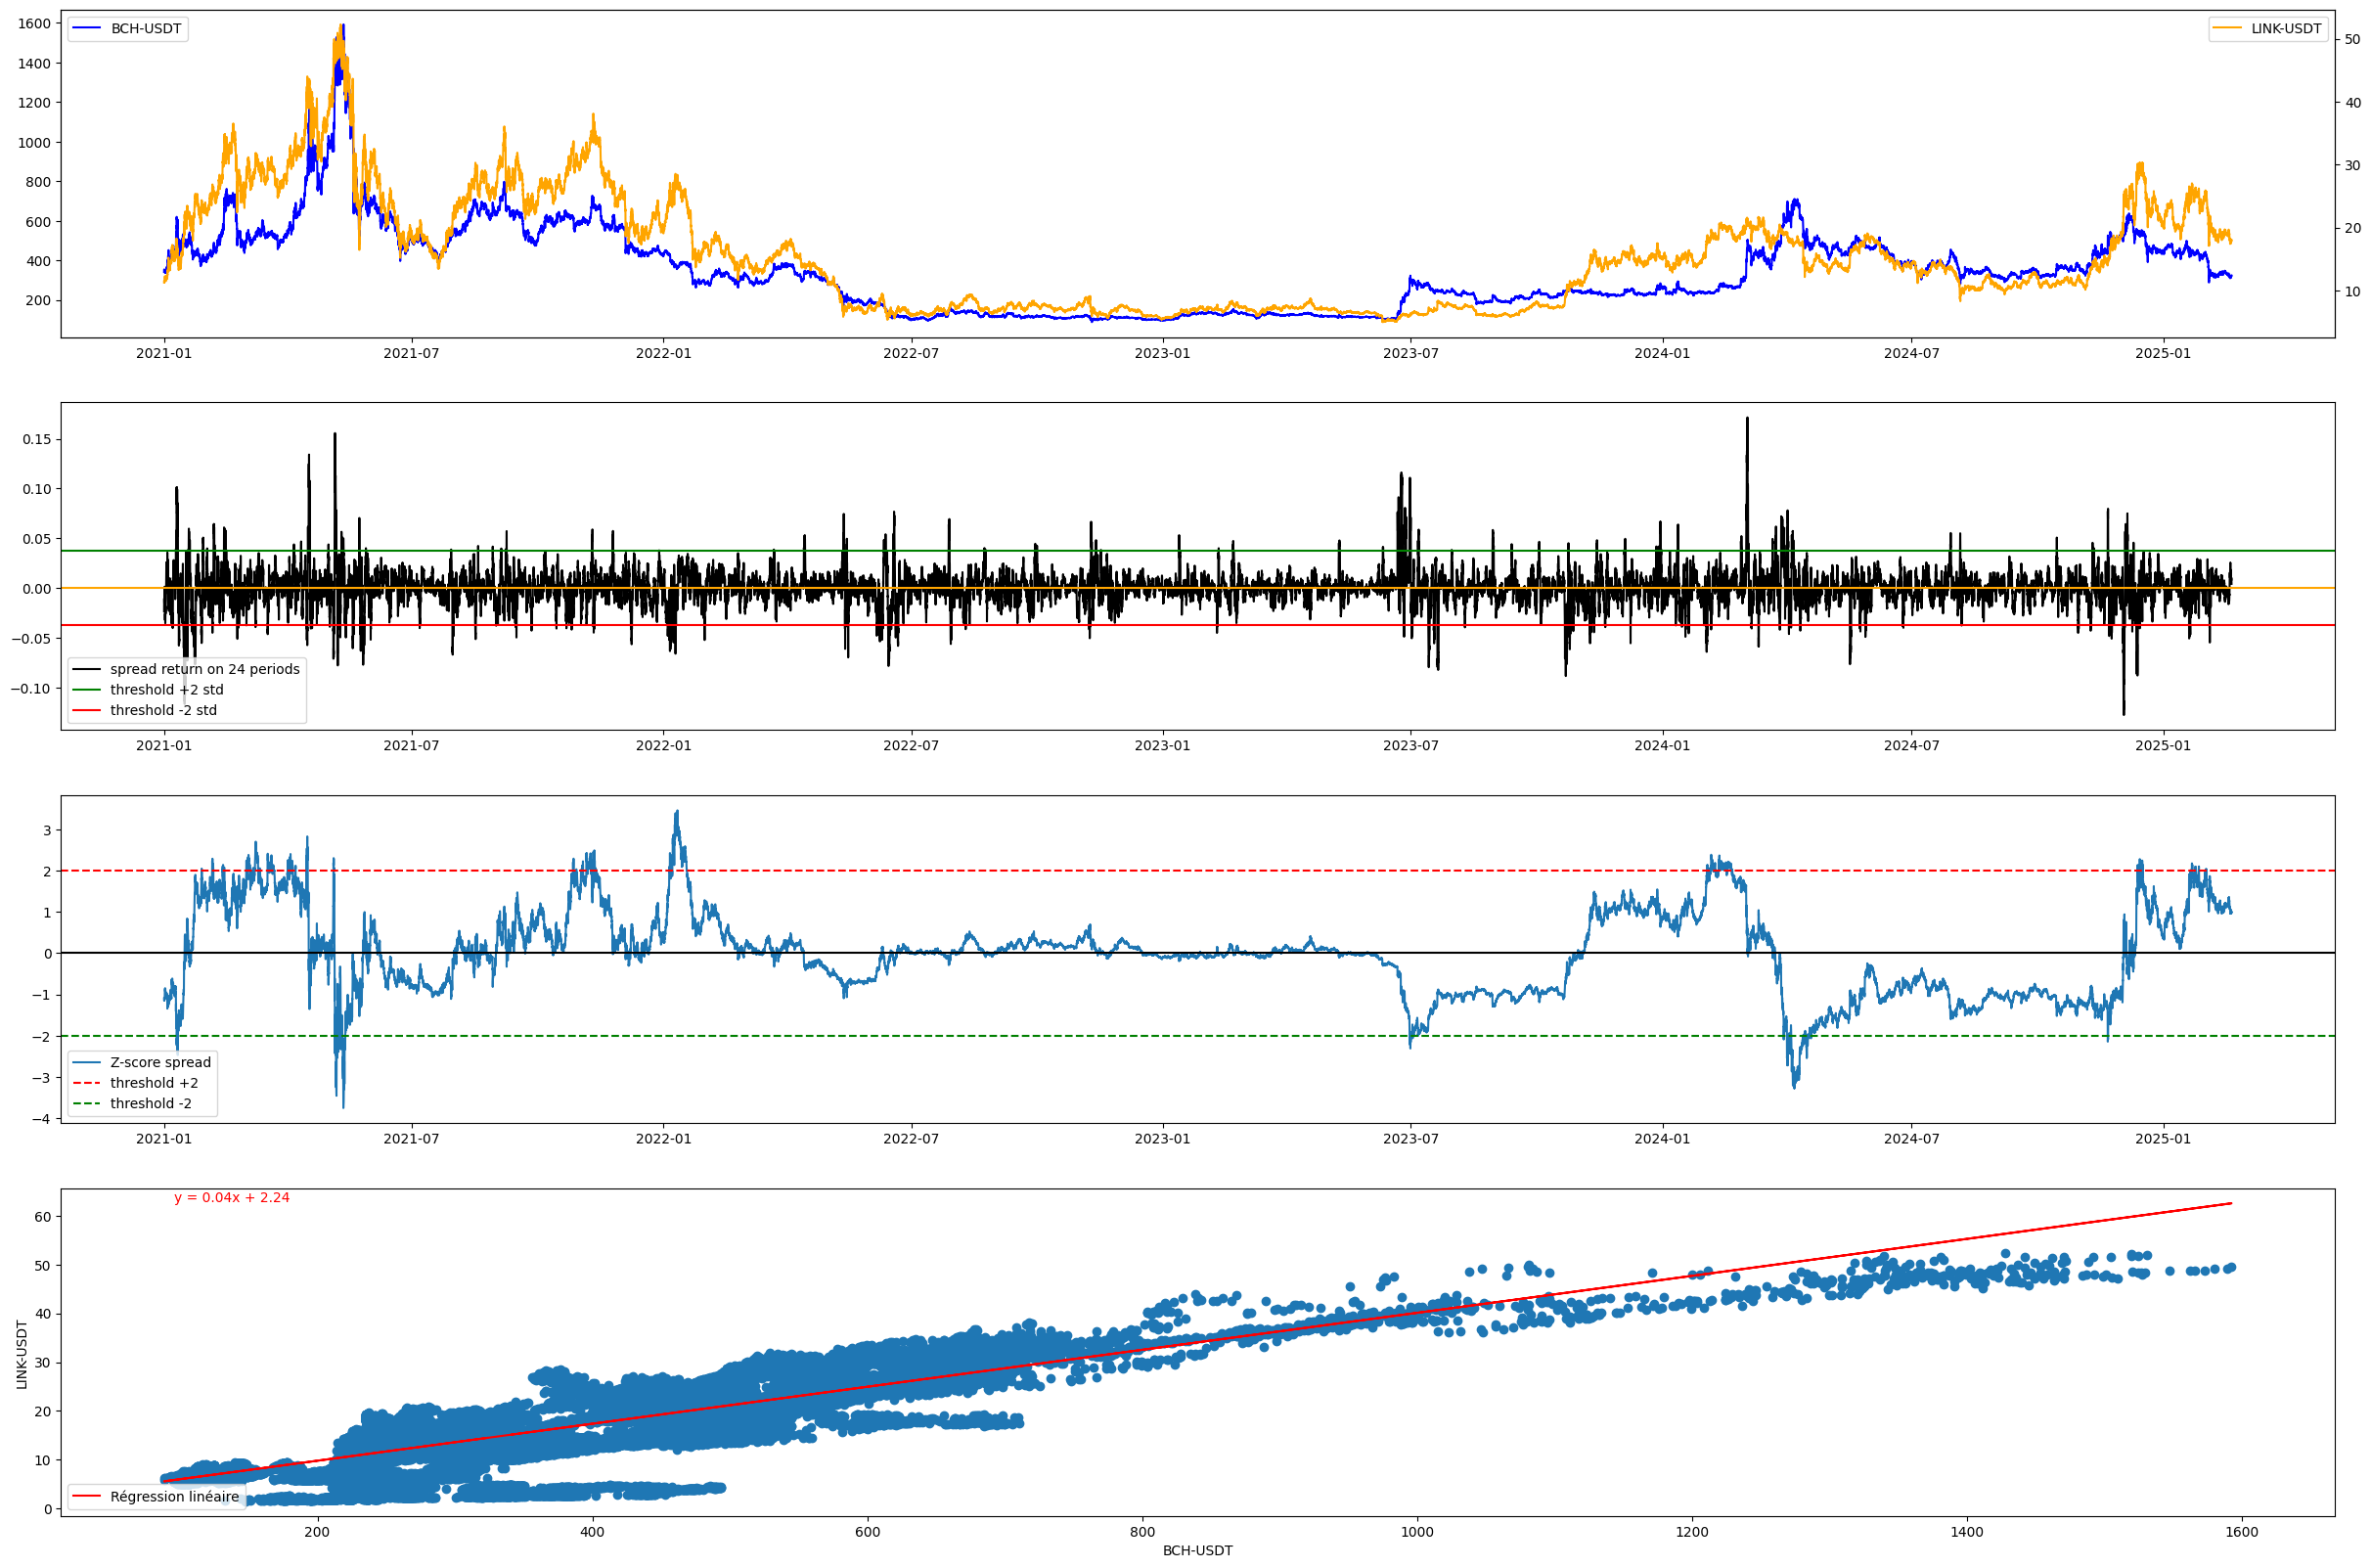

: 

In [ ]:
get_pair_informations("BCH-USDT", "LINK-USDT",24)

0.03840300662881403
date
2021-01-01 00:00:00   -0.440992
2021-01-01 01:00:00   -0.483680
2021-01-01 02:00:00   -0.527128
2021-01-01 03:00:00   -0.505721
2021-01-01 04:00:00   -0.499670
                         ...   
2025-02-19 12:00:00   -0.906838
2025-02-19 13:00:00   -0.912711
2025-02-19 14:00:00   -0.899453
2025-02-19 15:00:00   -0.901903
2025-02-19 16:00:00   -0.910057
Length: 36243, dtype: float64
-0.3876529818069944
Correlation = 71.29 %
Co-integration = 0.14339


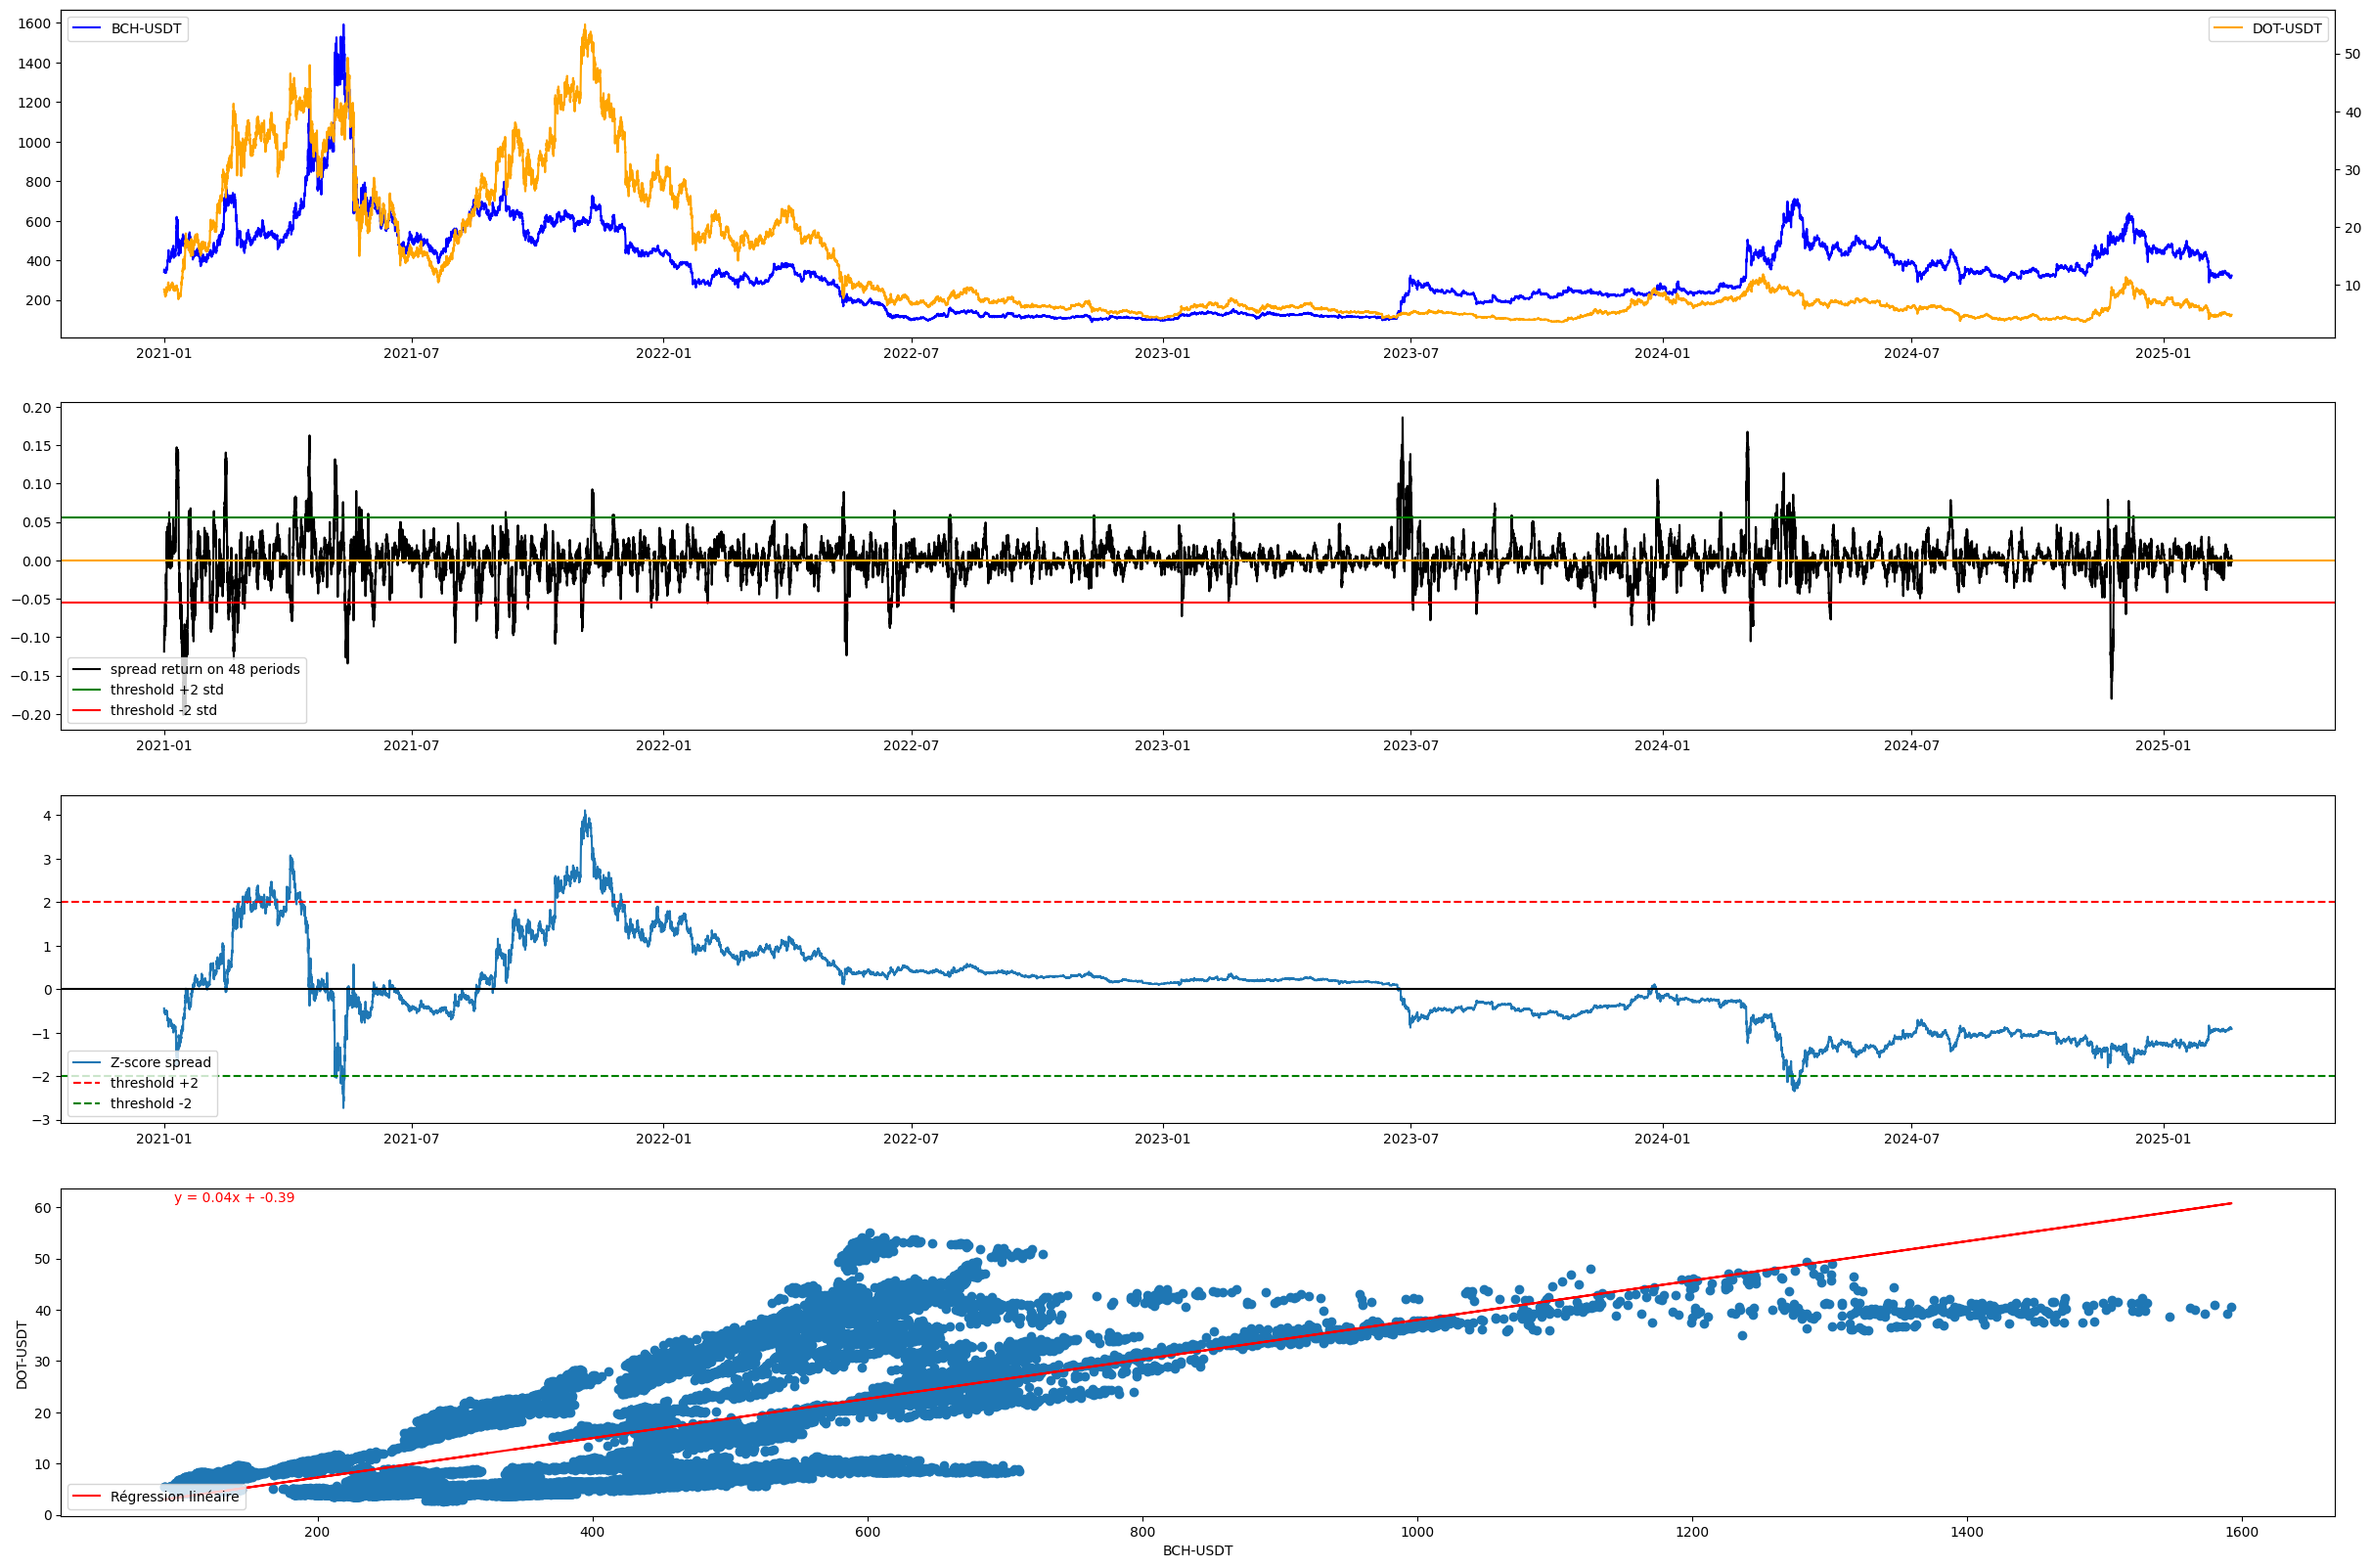

In [87]:
get_pair_informations("BCH-USDT", "DOT-USDT", 48)

0.6317055800815862
date
2021-01-01 00:00:00   -0.356647
2021-01-01 01:00:00   -0.315539
2021-01-01 02:00:00   -0.273855
2021-01-01 03:00:00   -0.294047
2021-01-01 04:00:00   -0.295391
                         ...   
2025-02-19 12:00:00    1.550788
2025-02-19 13:00:00    1.578156
2025-02-19 14:00:00    1.537455
2025-02-19 15:00:00    1.526438
2025-02-19 16:00:00    1.553764
Length: 36243, dtype: float64
7.196386124024518
Correlation = 81.94 %
Co-integration = 0.35514


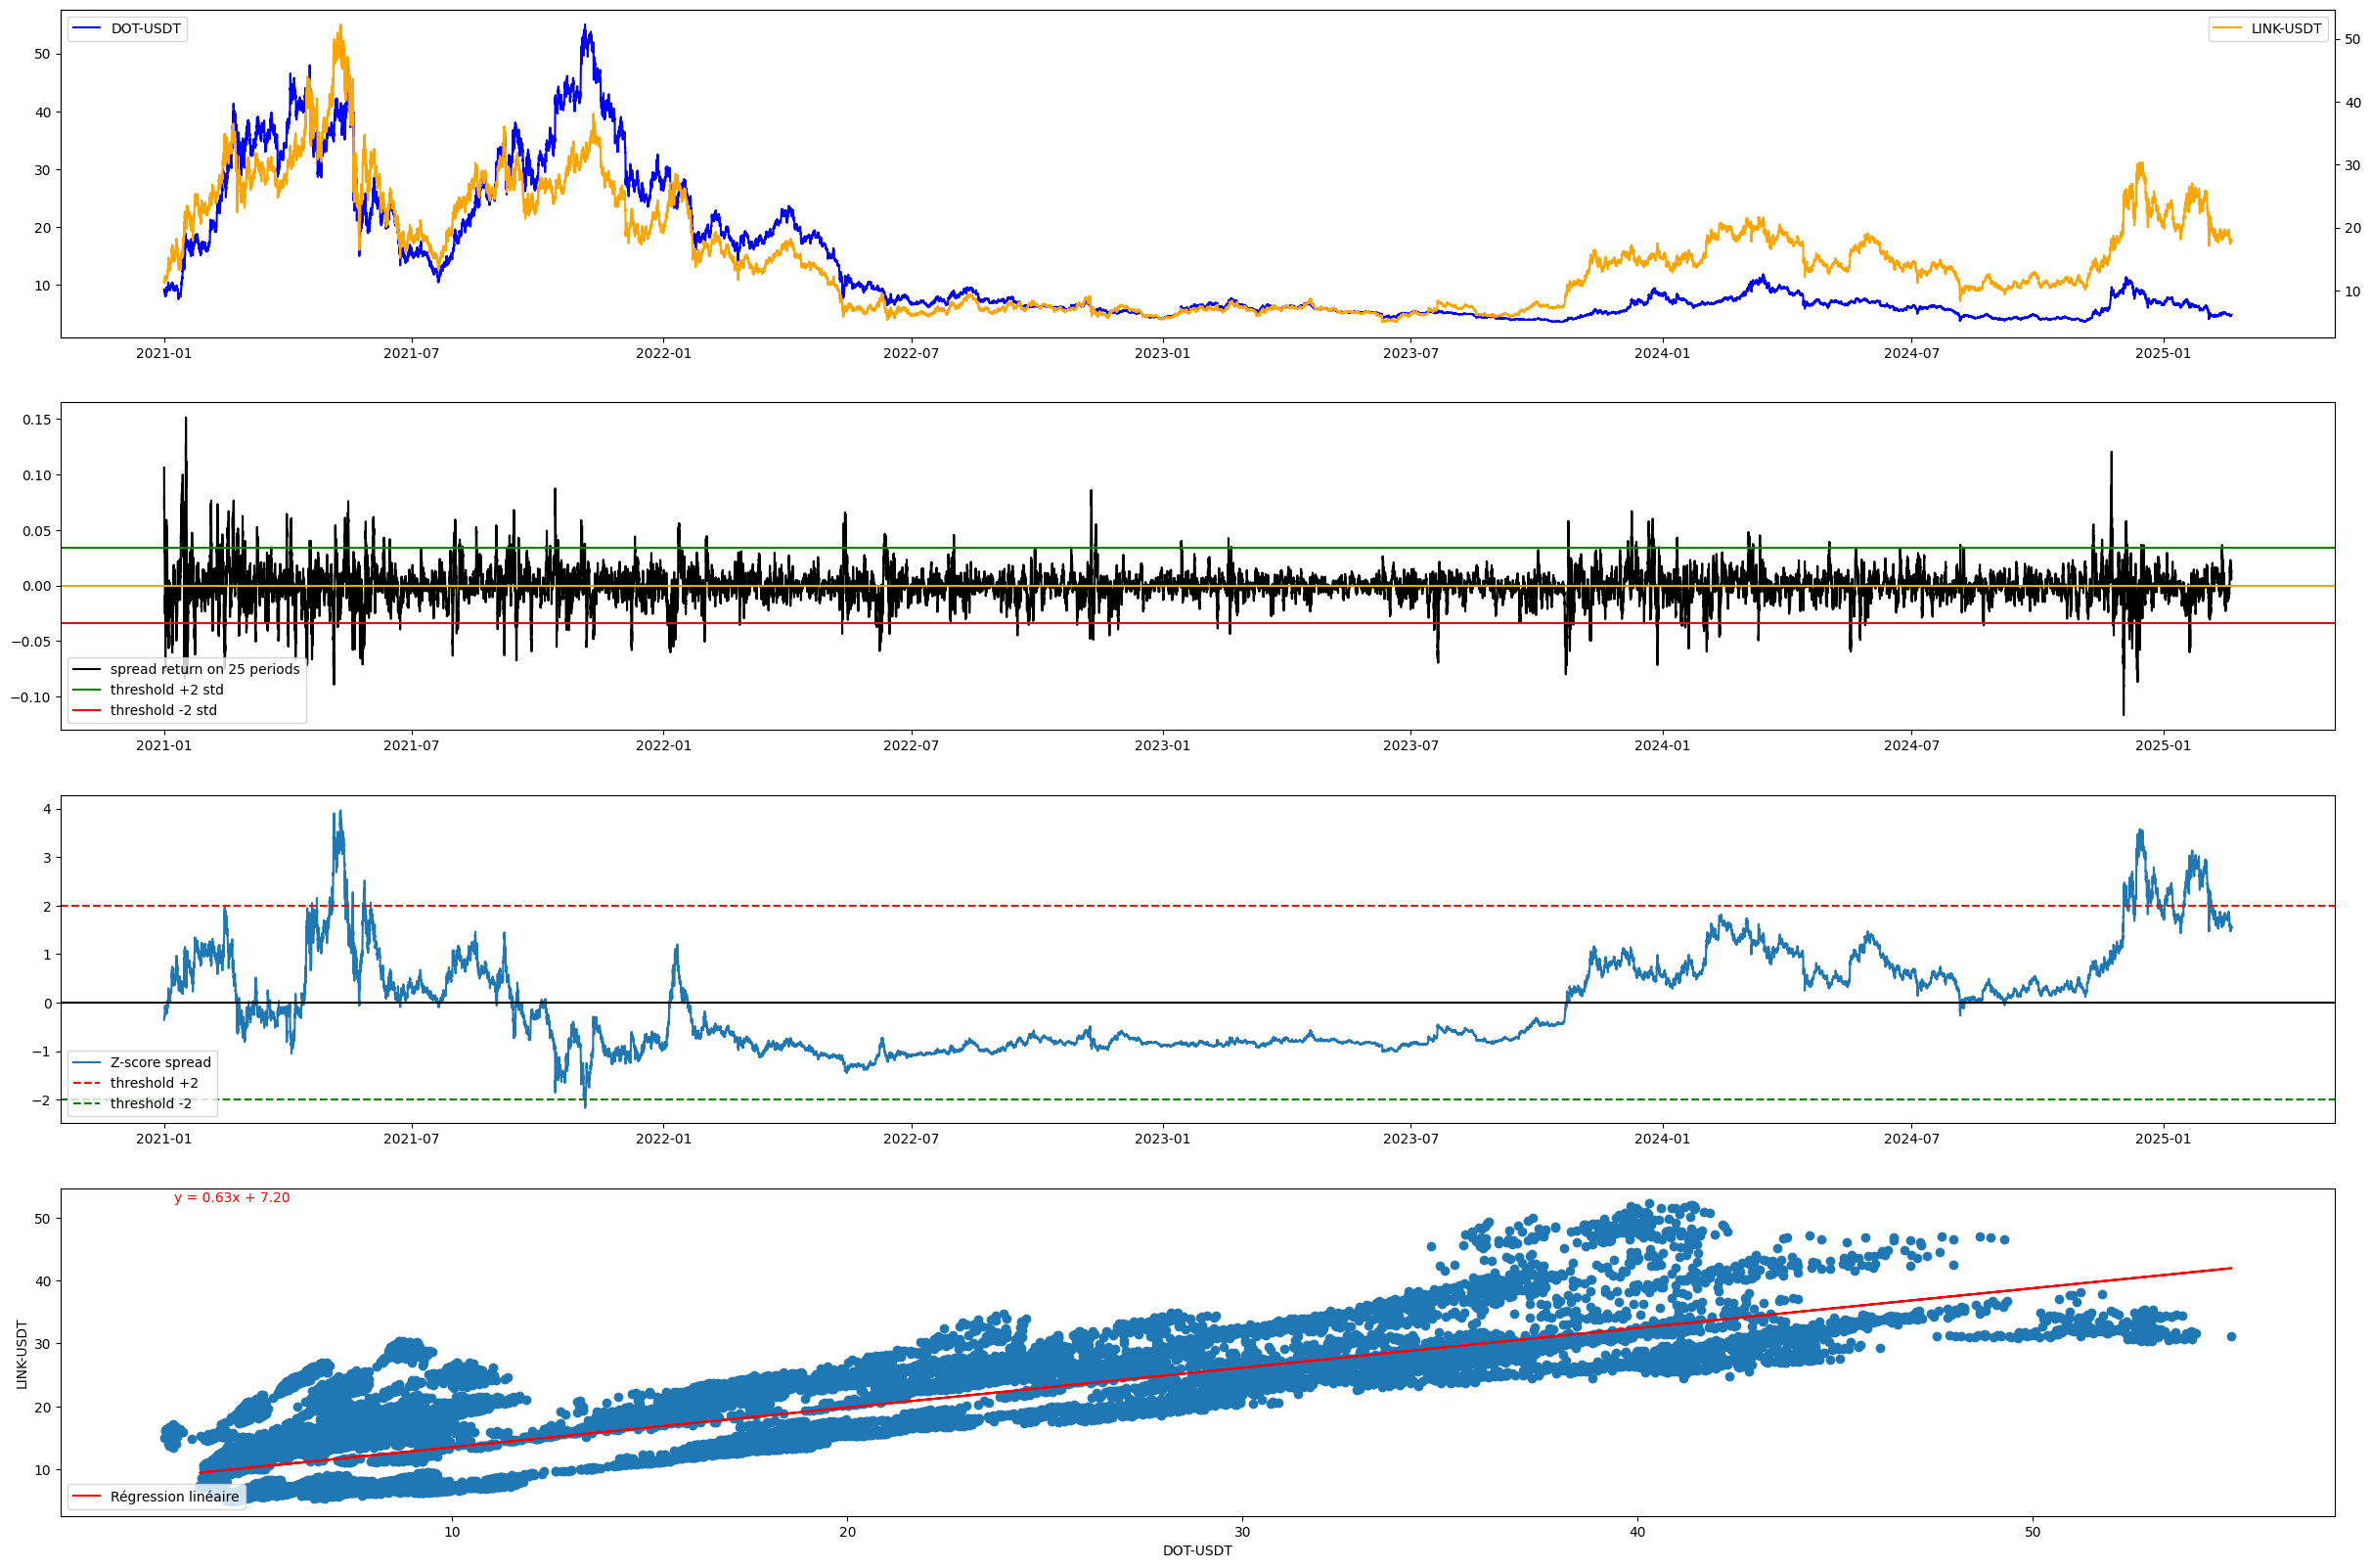

In [88]:
get_pair_informations("DOT-USDT", "LINK-USDT")